In [100]:
import tensorflow.keras as keras
import tensorflow as tf

In [101]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
class_name = {0: 'airplane', 1: 'airplane', 2: 'airplane', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

Text(0.5, 0, "This is frog's Image.")

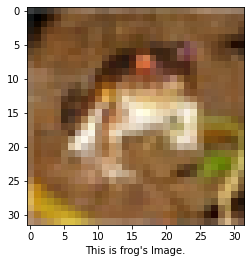

In [102]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.xlabel("This is {0}'s Image.".format(class_name[y_train[0][0]]))

In [103]:
print(x_train[0].shape)
y_train

print('x_train.shape = {0}'.format(x_train.shape))
print('y_train.shape = {0}'.format(y_train.shape))
print(y_train)

(32, 32, 3)
x_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [104]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [105]:
model.compile(
    optimizer= keras.optimizers.Adam(),
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction='auto', name='sparse_categorical_crossentropy'),
    metrics= ['accuracy']
)

In [106]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 128)         32896     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

In [147]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), validation_steps=64)

Epoch 1/10
782/782 [==============================] - 13s 16ms/step - loss: 0.1762 - accuracy: 0.9436 - val_loss: 2.3109 - val_accuracy: 0.6931
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1658 - accuracy: 0.9469 - val_loss: 2.4076 - val_accuracy: 0.6863
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1587 - accuracy: 0.9492 - val_loss: 2.4122 - val_accuracy: 0.6814
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1370 - accuracy: 0.9555 - val_loss: 2.5449 - val_accuracy: 0.6814
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1688 - accuracy: 0.9470 - val_loss: 2.6290 - val_accuracy: 0.6692
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1326 - accuracy: 0.9578 - val_loss: 2.8989 - val_accuracy: 0.6821
Epoch 7/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1375 - accuracy: 0.9580 - val_loss: 2.4777 - val_accuracy:

# Evaluating Model

In [148]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(10)

Text(0.5, 1.0, 'accuracy w.r.t epochs')

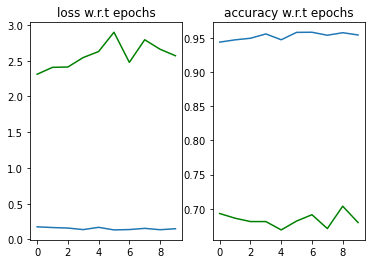

In [149]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(epochs, loss)
plt.plot(epochs, val_loss, c='green')
plt.title('loss w.r.t epochs')
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy, c='green')
plt.title('accuracy w.r.t epochs')

In [150]:
y_pred = model.predict(x_test)

In [151]:
import numpy as np

print(np.argmax(y_pred[1]))

1


Text(0.5, 0, "This is horse's Image. And prediction says this is horse")

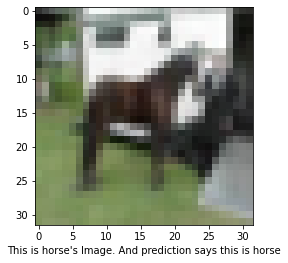

In [152]:
plt.imshow(x_test[20])
plt.xlabel("This is {0}'s Image. And prediction says this is {1}".format(class_name[y_test[20][0]], class_name[np.argmax(y_pred[20])]))